In [2]:
import torch, torch.nn as nn, copy, timeit, numpy.random as npr, numpy as np
from torch.distributions.bernoulli import Bernoulli 
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import plot, show, legend
from scipy.stats import uniform, gaussian_kde
import seaborn as sns
from tqdm import trange

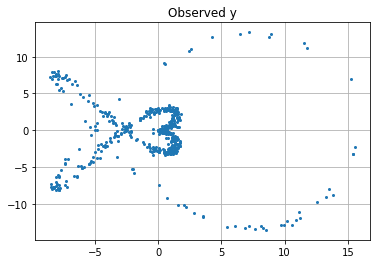

In [3]:
dd = np.load("model1.npy")
X, Y = dd.item()['X'], dd.item()['Y']
fig = plt.figure()
X.requires_grad = True
plt.plot(list(Y[:,0]), list(Y[:,1]), 'o', markersize=2)
plt.grid(True)
plt.title("Observed y")
Nobs, n_in = np.shape(X)
n_out = np.shape(Y)[1]
fig.savefig('img1.png', dpi=2000, bbox_inches = 'tight')

In [4]:
n_h1 = 20
model = nn.Sequential(nn.Linear(n_in, n_h1),
                      nn.Tanh(),
                      nn.Linear(n_h1, n_out))

In [5]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)

def init_uniform(m):
    if type(m) == nn.Linear:
        nn.init.uniform_(m.weight)

In [6]:
model.apply(init_normal)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, nesterov=True)

In [9]:
n_iter = 100_000
start = time()
for epoch in range(n_iter):
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    if (epoch+1)%(n_iter/10) == 0 :
        print("Epoch: %d; loss: %.3f; time: %.1f mins" % (epoch+1, loss.item(), (time()-start)/60))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 10000; loss: 0.113; time: 0.1 mins
Epoch: 20000; loss: 0.105; time: 0.2 mins
Epoch: 30000; loss: 0.098; time: 0.3 mins
Epoch: 40000; loss: 0.092; time: 0.3 mins
Epoch: 50000; loss: 0.088; time: 0.4 mins
Epoch: 60000; loss: 0.084; time: 0.5 mins
Epoch: 70000; loss: 0.081; time: 0.6 mins
Epoch: 80000; loss: 0.079; time: 0.7 mins
Epoch: 90000; loss: 0.076; time: 0.8 mins
Epoch: 100000; loss: 0.074; time: 0.9 mins


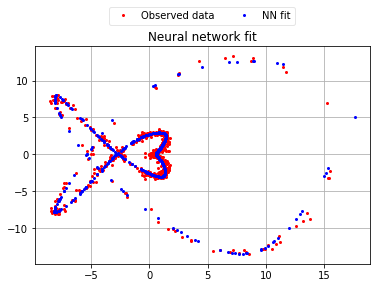

In [11]:
fig = plt.figure()
plt.plot(list(Y[:,0]), list(Y[:,1]), 'ro', markersize=2, label="Observed data")
plt.plot(list(y_pred[:,0]), list(y_pred[:,1]), 'bo', markersize=2, label="NN fit")
plt.grid(True)
plt.legend(ncol=2, loc=[0.22,1.1], fancybox=True, framealpha=0.5)
plt.title("Neural network fit")
fig.savefig('img2.png', dpi=2000, bbox_inches = 'tight')

In [25]:
pw_dist = np.zeros((Nobs,Nobs))
for i in trange(Nobs) :
    for j in range(i) :
        pw_dist[i,j] = np.linalg.norm(Y_np[i]-Y_np[j])
        pw_dist[j,i] = pw_dist[i,j]

100%|██████████| 500/500 [00:00<00:00, 592.96it/s] 


In [26]:
pw_dist

array([[ 0.        ,  5.15843534,  4.10683203, ..., 17.05953789,
         2.26865768,  5.62293577],
       [ 5.15843534,  0.        ,  1.72255039, ..., 12.15419483,
         4.46018982,  0.74814773],
       [ 4.10683203,  1.72255039,  0.        , ..., 12.95577908,
         2.87653589,  1.76555097],
       ...,
       [17.05953789, 12.15419483, 12.95577908, ...,  0.        ,
        15.52099514, 11.53651428],
       [ 2.26865768,  4.46018982,  2.87653589, ..., 15.52099514,
         0.        ,  4.63877773],
       [ 5.62293577,  0.74814773,  1.76555097, ..., 11.53651428,
         4.63877773,  0.        ]])

In [31]:
np.unravel_index(np.argmax(pw_dist, axis=None), pw_dist.shape)

(22, 385)

In [33]:
Y[22], Y[385]

(tensor([-8.3671,  7.9802]), tensor([ 10.5472, -12.8297]))

In [5]:
kernel([15,-5])

array([0.00017534])

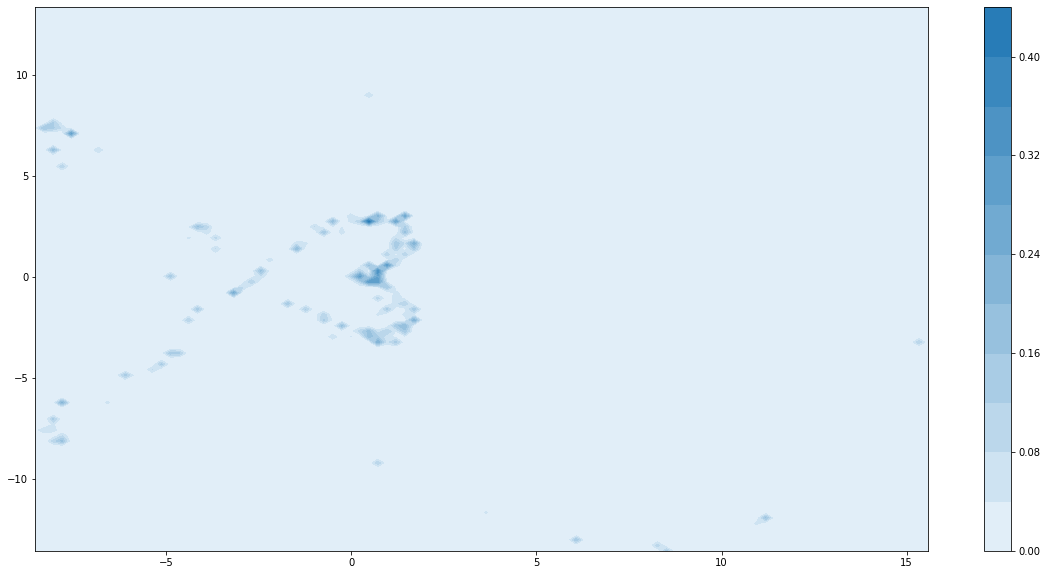

In [6]:
plt.figure(figsize=(20,10))
ax = sns.kdeplot(Y[:,0].numpy(), Y[:,1].numpy(), shade=True, cbar=True, bw=1e-2)